In [5]:
import pandas as pd
import yake

def generate_word_cloud(text, language="en", max_ngram_size=2, deduplication_threshold=0.9,
                        deduplication_algorithm='seqm', window_size=1, num_keywords=20):
    """
    Generate a word cloud from the given text using YAKE.

    Args:
        text (str): The input text for keyword extraction.
        language (str): The language for keyword extraction (default: "en").
        max_ngram_size (int): The maximum n-gram size (default: 2).
        deduplication_threshold (float): The deduplication threshold (default: 0.9).
        deduplication_algorithm (str): The deduplication algorithm (default: 'seqm').
        window_size (int): The window size (default: 1).
        num_keywords (int): The number of keywords to extract (default: 20).

    Returns:
        list: A list of dictionaries containing keywords and their weights.
    """
    try:
        kw_extractor = yake.KeywordExtractor(lan=language,
                                            n=max_ngram_size,
                                            dedupLim=deduplication_threshold,
                                            dedupFunc=deduplication_algorithm,
                                            windowsSize=window_size,
                                            top=num_keywords)

        keywords = kw_extractor.extract_keywords(text)

        # Process and format the keywords
        formatted_keywords = [{'label': kw.upper(), 'value': float(1 - weight) * 30} for kw, weight in keywords]

        return formatted_keywords
    except Exception as e:
        # Handle exceptions, return a default value in case of an error
        print(f"Error: {str(e)}")
        return []

# Example usage
text = """
     Supervised learning is the machine learning task of
     learning a function that maps an input to an output based
     on example input-output pairs.[1] It infers a function
     from labeled training data consisting of a set of
     training examples.[2] In supervised learning, each
     example is a pair consisting of an input object
     (typically a vector) and a desired output value (also
     called the supervisory signal). A supervised learning
     algorithm analyzes the training data and produces an
     inferred function, which can be used for mapping new
     examples. An optimal scenario will allow for the algorithm
     to correctly determine the class labels for unseen
     instances. This requires the learning algorithm to
     generalize from the training data to unseen situations
     in a 'reasonable' way (see inductive bias).
  """

word_cloud = generate_word_cloud(text)

# Print the generated word cloud
for keyword in word_cloud:
    print(f"Keyword: {keyword['label']}, Weight: {keyword['value']:.2f}")


Keyword: INPUT OBJECT, Weight: 29.33
Keyword: SUPERVISED LEARNING, Weight: 29.24
Keyword: TRAINING DATA, Weight: 29.22
Keyword: PAIR CONSISTING, Weight: 29.20
Keyword: INPUT-OUTPUT PAIRS., Weight: 29.14
Keyword: SUPERVISORY SIGNAL, Weight: 29.14
Keyword: OUTPUT BASED, Weight: 29.07
Keyword: DESIRED OUTPUT, Weight: 29.07
Keyword: DATA CONSISTING, Weight: 28.79
Keyword: TRAINING EXAMPLES., Weight: 28.73
Keyword: LABELED TRAINING, Weight: 28.47
Keyword: LEARNING, Weight: 28.45
Keyword: MACHINE LEARNING, Weight: 28.20
Keyword: LEARNING TASK, Weight: 28.20
Keyword: LEARNING ALGORITHM, Weight: 28.17
Keyword: TRAINING, Weight: 28.01
Keyword: INPUT, Weight: 27.86
Keyword: CONSISTING, Weight: 27.86
Keyword: SUPERVISED, Weight: 27.73
Keyword: OUTPUT, Weight: 27.52


In [2]:
!pip install yake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.9 MB/s eta 0:00:00


In [6]:
!pip install wordcloud matplotlib


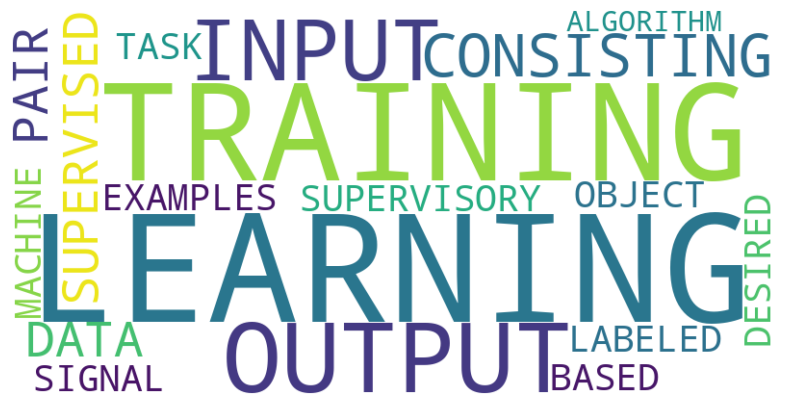

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Your code for generating the keyword data using YAKE
# ...

# Create a text string from the keywords based on their weights
text_for_wordcloud = " ".join(keyword['label'] for keyword in word_cloud)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
